In [1]:
#Dataset: bbc-news-data.txt
#location: https://mitu.co.in/dataset

### Import necessary libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

###  Read The Dataset

In [3]:
file = open('bbc-text-data.csv','r')

In [4]:
data = file.readlines()

In [5]:
len(data)

2225

### Feature Extraction

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
tfidf = TfidfVectorizer(stop_words='english')

In [8]:
x_vect = tfidf.fit_transform(data)

x_vect.shape

(2225, 29126)

###  Build the model

In [9]:
from sklearn.cluster import AgglomerativeClustering

km = AgglomerativeClustering(n_clusters=5,linkage='ward')

In [10]:
labels = km.fit_predict(x_vect.toarray())

In [11]:
labels

array([4, 0, 0, ..., 0, 0, 0])

In [12]:
df = pd.DataFrame(data,columns=['Text'])

df[labels ==2]

,Text
3,yeading face newcastle in fa cup premiership s...
7,henman hopes ended in dubai third seed tim hen...
8,wilkinson fit to face edinburgh england captai...
14,moya emotional after davis cup win carlos moya...
17,connors boost for british tennis former world ...
...,...
2164,murray to make cup history andrew murray will ...
2177,henman decides to quit davis cup tim henman ha...
2180,campbell lifts lid on united feud arsenal s so...
2195,owen delighted with real display michael owen ...


In [13]:
print('0',len(df[labels ==0]))
print('1',len(df[labels ==1]))
print('2',len(df[labels ==2]))
print('3',len(df[labels ==3]))
print('4',len(df[labels ==4]))

0 1121
1 225
2 365
3 146
4 368


In [14]:
pd.Series(labels).value_counts().to_dict()

{0: 1121, 4: 368, 2: 365, 1: 225, 3: 146}

In [15]:
#help(KMeans)

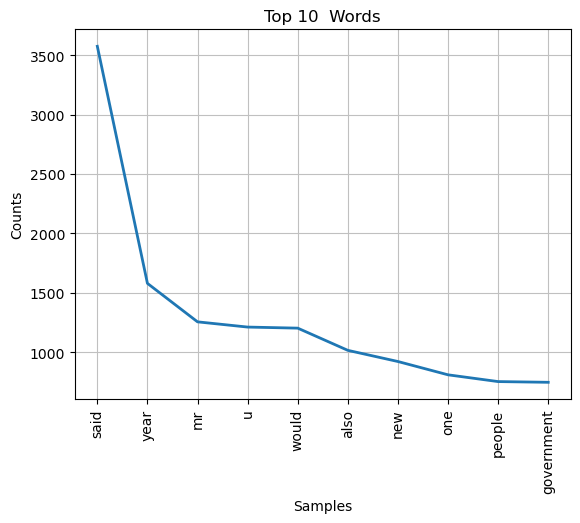

[('said', 3576),
 ('year', 1580),
 ('mr', 1256),
 ('u', 1212),
 ('would', 1203),
 ('also', 1016),
 ('new', 922),
 ('one', 810),
 ('people', 753),
 ('government', 747)]

In [16]:
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist


l_steamer = WordNetLemmatizer()
data_list = df.Text[labels ==0].to_list()
str1 = ' '.join(data_list)
words = word_tokenize(str1)

words = [word for word in words if word.isalnum()]
words = [word for word in words if word not in string.punctuation]
words = [word for word in words if word not in stopwords.words('english')]

words = [l_steamer.lemmatize(word) for word in words]

freq_data = FreqDist(words)
freq_data.plot(10, title = 'Top 10  Words');
freq_data.most_common(10)

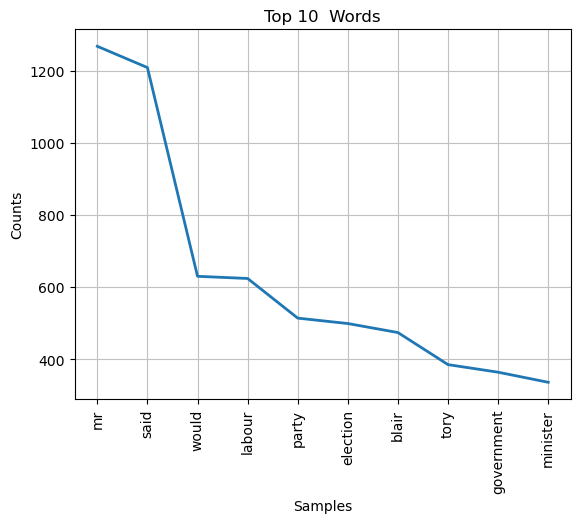

[('mr', 1268),
 ('said', 1209),
 ('would', 630),
 ('labour', 624),
 ('party', 514),
 ('election', 499),
 ('blair', 474),
 ('tory', 385),
 ('government', 364),
 ('minister', 336)]

In [17]:
data_list = df.Text[labels ==1].to_list()
str1 = ' '.join(data_list)

words = word_tokenize(str1)

words = [word for word in words if word.isalnum()]
words = [word for word in words if word not in string.punctuation]
words = [word for word in words if word not in stopwords.words('english')]

words = [l_steamer.lemmatize(word) for word in words]

freq_data = FreqDist(words)
freq_data.plot(10, title = 'Top 10  Words');
freq_data.most_common(10)

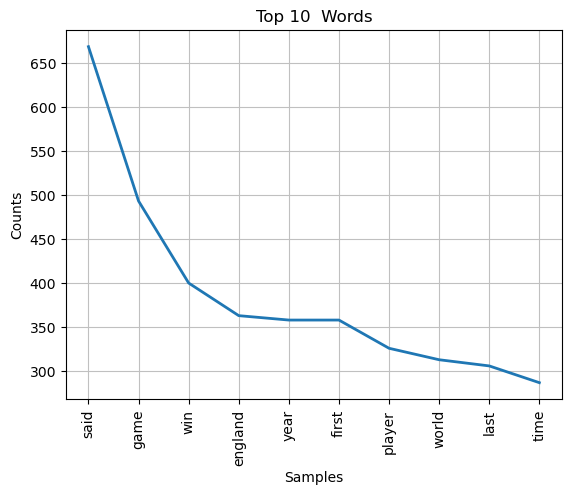

[('said', 668),
 ('game', 493),
 ('win', 400),
 ('england', 363),
 ('year', 358),
 ('first', 358),
 ('player', 326),
 ('world', 313),
 ('last', 306),
 ('time', 287)]

In [18]:
data_list = df.Text[labels ==2].to_list()
str1 = ' '.join(data_list)

words = word_tokenize(str1)

words = [word for word in words if word.isalnum()]
words = [word for word in words if word not in string.punctuation]
words = [word for word in words if word not in stopwords.words('english')]

words = [l_steamer.lemmatize(word) for word in words]


freq_data = FreqDist(words)
freq_data.plot(10, title = 'Top 10  Words');
freq_data.most_common(10)

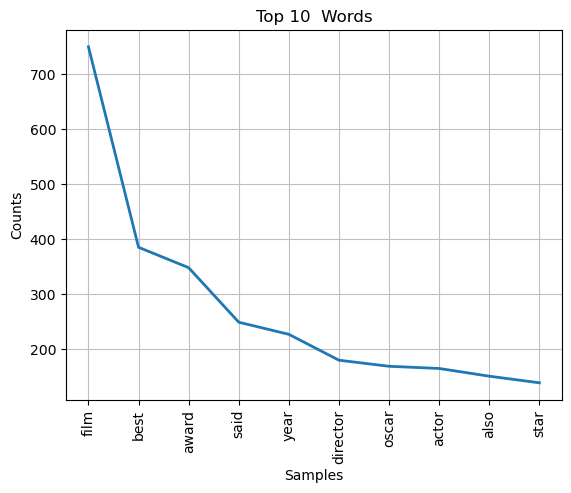

[('film', 749),
 ('best', 385),
 ('award', 348),
 ('said', 249),
 ('year', 227),
 ('director', 180),
 ('oscar', 169),
 ('actor', 165),
 ('also', 151),
 ('star', 139)]

In [19]:
data_list = df.Text[labels ==3].to_list()
str1 = ' '.join(data_list)

words = word_tokenize(str1)

words = [word for word in words if word.isalnum()]
words = [word for word in words if word not in string.punctuation]
words = [word for word in words if word not in stopwords.words('english')]

words = [l_steamer.lemmatize(word) for word in words]


freq_data = FreqDist(words)
freq_data.plot(10, title = 'Top 10  Words');
freq_data.most_common(10)

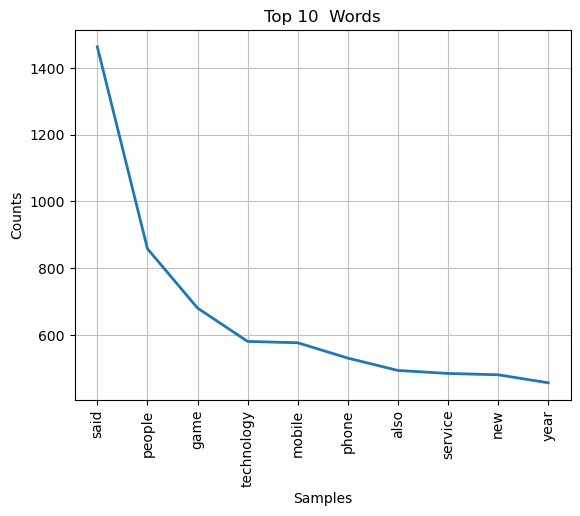

[('said', 1463),
 ('people', 858),
 ('game', 680),
 ('technology', 580),
 ('mobile', 576),
 ('phone', 530),
 ('also', 493),
 ('service', 484),
 ('new', 480),
 ('year', 456)]

In [20]:
data_list = df.Text[labels ==4].to_list()
str1 = ' '.join(data_list)

words = word_tokenize(str1)

words = [word for word in words if word.isalnum()]
words = [word for word in words if word not in string.punctuation]
words = [word for word in words if word not in stopwords.words('english')]

words = [l_steamer.lemmatize(word) for word in words]

freq_data = FreqDist(words)
freq_data.plot(10, title = 'Top 10  Words');
freq_data.most_common(10)

In [21]:
help(AgglomerativeClustering)

Help on class AgglomerativeClustering in module sklearn.cluster._agglomerative:

class AgglomerativeClustering(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  AgglomerativeClustering(n_clusters=2, *, affinity='deprecated', metric=None, memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', distance_threshold=None, compute_distances=False)
 |  
 |  Agglomerative Clustering.
 |  
 |  Recursively merges pair of clusters of sample data; uses linkage distance.
 |  
 |  Read more in the :ref:`User Guide <hierarchical_clustering>`.
 |  
 |  Parameters
 |  ----------
 |  n_clusters : int or None, default=2
 |      The number of clusters to find. It must be ``None`` if
 |      ``distance_threshold`` is not ``None``.
 |  
 |  affinity : str or callable, default='euclidean'
 |      The metric to use when calculating distance between instances in a
 |      feature array. If metric is a string or callable, it must be one of
 |      the options allowed by :func:`sklearn